Exploring the $\chi^2$ distribution
===

Start with some model to generate random data.  <br>
We'll use $0.2+\frac{sin(x)}{x+1}$ over the range $0\leq x<15$ <br>
Generate $N$ random numbers according to this distribution and make a histogram of the results using 30 bins.

An easy way to generate random numbers according to an arbitrary distribution is to use rejection sampling (here's a great [decription  of the technique](https://matthewfeickert.github.io/Statistics-Notes/notebooks/simulation/Rejection-Sampling-MC.html) )

1) Make a histogram of your random distribution.  Verify that the the numbers you generated agree with the shape of the function.  Generate at least 10000 points and plot your data in a histogram with errorbars.  You can use numpy+matplotlib+etc, PyROOT, or a mix.  Think about how to appropriately normalize your function, then overlay it with the data.  The normalization depends on the number of bins, the bin range and the number of points thrown.  You may find it easier to first nromalize the area of your function to 1.0, thus turning it into a proper PDF.  

**I used chatGPT for a variety of things in this assignment including understanding and implementing rejection sampling, understanding and implementing normalization, creating error bars in my matplotlib plots, and general debugging. If needed, I can explain any piece of my code.**

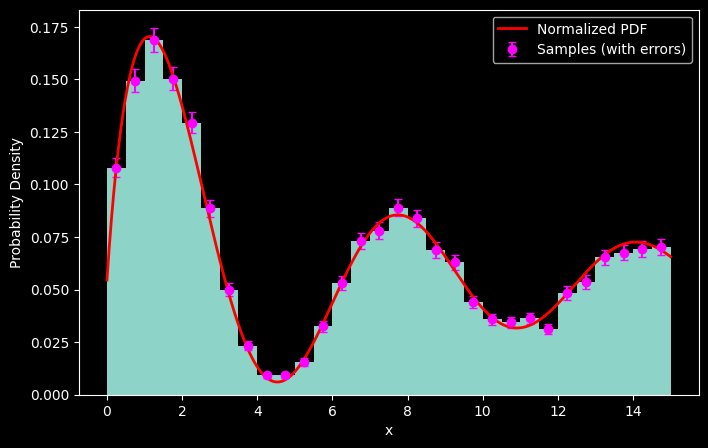

In [46]:
# your work goes here

#used chatGPT to aid in the mathematical aspect of this assignment (creating errors & normalization)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

x_min, x_max = 0, 15
def random_func(x):
    return 0.2+np.sin(x)/(x+1)

def gen_random(N):
  x_min, x_max = 0,15
  x_grid = np.linspace(x_min, x_max, 1000)
  fmax = np.max(random_func(x_grid))

  xs = []
  while len(xs) < N:
      x_try = np.random.uniform(x_min, x_max)
      y_try = np.random.uniform(0, fmax)
      if y_try < random_func(x_try):
          xs.append(x_try)
  return np.array(xs)

N = 10000
samples = gen_random(N)


yb, xb = np.histogram(samples, bins=30, range=(0,15))
err = np.sqrt(yb)
bc = 0.5 * (xb[1:] + xb[:-1])

bin_width = xb[1] - xb[0]
yb_density = yb / (N * bin_width)
err_density = err / (N * bin_width)


plt.figure(figsize=(8,5))
plt.hist(samples, bins=30, range=(0,15), density=True)
plt.errorbar(bc, yb_density, yerr=err_density, fmt='o', color='magenta', capsize=3, label='Samples (with errors)')


norm = quad(random_func, x_min, x_max)[0]
def f_norm(x):
  return random_func(x) / norm

x_vals = np.linspace(x_min, x_max, 1000)
f_vals = f_norm(x_vals)
plt.plot(x_vals, f_vals, 'r-', lw=2, label='Normalized PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

2) Repeat the above experiment at least 1000 times.  For each experiment calculate the $\chi^2$ of your data with respect to your (properly normalized) model.  Plot (histogram) the $\chi^2$ distribution and compare it to the functional form of the $\chi^2(ndof=30)$ distribution.  You can find the form of the $\chi^2(ndof)$ PDF function in many places and implement it using the Gamma function or use a premade function, eg:
* [wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution)
* [scipy.stats.chi2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html#scipy.stats.chi2)

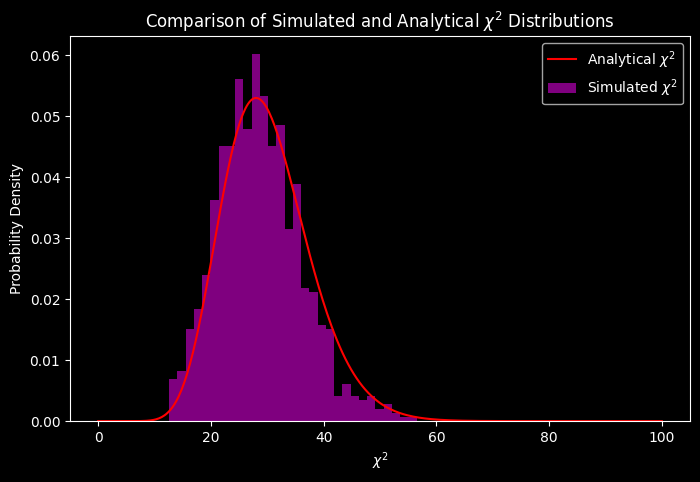

In [53]:
# your work goes here
from scipy.stats import chi2
from scipy.special import gamma
chi2_values = []

bins_for_chi2 = np.linspace(x_min, x_max, 31)
expected_counts = []

for i in range(30):
  xi, xj = bins_for_chi2[i], bins_for_chi2[i+1]
  p_i = quad(random_func, xi, xj)[0] / norm
  expected_counts.append(N * p_i)


for i in range(1000):
  samples = gen_random(N)
  yb, xb = np.histogram(samples, bins=30, range=(0,15))
  chi2_value = np.sum((yb - expected_counts)**2 / expected_counts)
  chi2_values.append(chi2_value)

k = 30
x = np.linspace(0, 100, 400)
pdf = chi2.pdf(x, df=k)
plt.style.use("dark_background")
plt.figure(figsize=(8,5))
plt.plot(x, pdf, label = r'Analytical $\chi^2$', color = 'red')
plt.hist(chi2_values, bins=30, label=r'Simulated $\chi^2$',density = True, alpha = 0.5, color = 'magenta')
plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability Density')
plt.title(r'Comparison of Simulated and Analytical $\chi^2$ Distributions')
plt.legend()
plt.show()

**Only required for Phys5630**

3) Modify your code above to perform the following study. <br>
Repeat (2) for nbins = $ndof = 30, 50, 75, 100$ and calculate the reduced $\chi^2$, eg $\chi^2/ndof$ for each experiment.  Plot the mean value of the reduced $\chi^2$ with errorbars versus $ndof$.  Make a table comparing your calculations to the expected results.

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

<Figure size 640x480 with 0 Axes>

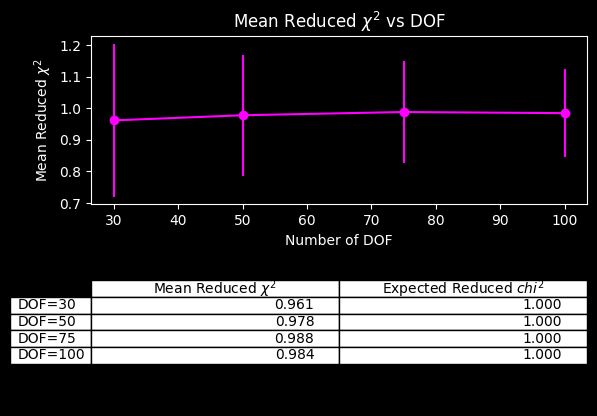

In [65]:

from scipy.stats import chi2
from scipy.special import gamma



nbins = [30, 50, 75, 100]
reduced_chi2_values_array = []

for n in nbins:
  reduced_chi2_values = []

  bins_for_chi2 = np.linspace(x_min, x_max, n+1)
  expected_counts = []

  for i in range(n):
    xi, xj = bins_for_chi2[i], bins_for_chi2[i+1]
    p_i = quad(random_func, xi, xj)[0] / norm
    expected_counts.append(N * p_i)

  for i in range(1000):
    samples = gen_random(N)
    yb, xb = np.histogram(samples, bins=n, range=(0,15))
    chi2_value = np.sum((yb - expected_counts)**2 / expected_counts)
    reduced_chi2_values.append(chi2_value/n)

  reduced_chi2_values_array.append(reduced_chi2_values)

plt.figure()
fig, ax = plt.subplots(2,1)
mean_reduced_chi2 = np.mean(reduced_chi2_values_array, axis=1)
std_reduced_chi2  = np.std(reduced_chi2_values_array, axis=1)
ax[0].errorbar(nbins, mean_reduced_chi2, yerr = std_reduced_chi2, marker='o', color='magenta')
ax[0].set_xlabel('Number of DOF')
ax[0].set_ylabel(r'Mean Reduced $\chi^2$')
ax[0].set_title(r'Mean Reduced $\chi^2$ vs DOF')

expected_reduced_chi2 = np.ones(len(nbins))
columns = (r'Mean Reduced $\chi^2$', r'Expected Reduced $chi^2$')
rows = [f'DOF={n}' for n in nbins]
table_data = [
    [f"{mean_reduced_chi2[i]:.3f}", f"{expected_reduced_chi2[i]:.3f}"]
    for i in range(len(nbins))
]
table = ax[1].table(cellText=table_data, colLabels=columns, rowLabels=rows, loc='center')
for key, cell in table.get_celld().items():
    cell.set_text_props(color='black')
ax[1].axis('off')
plt.show()